In [124]:
import pandas as pd
import numpy as np

# Data Loading and Preprocessing

In [125]:
df = pd.read_csv('data/DSL-StrongPasswordData.csv')
df.sum()

subject            s002s002s002s002s002s002s002s002s002s002s002s0...
sessionIndex                                                   91800
rep                                                           520200
H.period                                                   1904.9262
DD.period.t                                                5388.6217
UD.period.t                                                3483.6955
H.t                                                         1748.833
DD.t.i                                                     3449.3299
UD.t.i                                                     1700.4969
H.i                                                        1663.9357
DD.i.e                                                     3251.1835
UD.i.e                                                     1587.2478
H.e                                                        1818.4228
DD.e.five                                                  7699.6484
UD.e.five                         

In [126]:
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


Anomaly detection per user (not general): it will allow us to make a specific profile over keystroke

In [127]:
drop_cols = ['sessionIndex', 'rep']
df = df.drop(drop_cols, axis=1)
df.head()

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [128]:
import sklearn.preprocessing as preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(df[['subject']])
onehotlabels = enc.transform(df[['subject']]).toarray()
onehotlabels.shape

(20400, 51)

In [129]:
# replace subjects names with one hot encoding in the single column "subject"
df = df.drop(['subject'], axis=1)
subjects_df = pd.DataFrame(onehotlabels, columns=enc.get_feature_names_out(['subject']))
df = df.reset_index(drop=True)
df = pd.concat([df, subjects_df], axis=1)
df.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,subject_s048,subject_s049,subject_s050,subject_s051,subject_s052,subject_s053,subject_s054,subject_s055,subject_s056,subject_s057
0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data splitting

In [130]:
train_set, test_set = np.split(df.sample(frac=1), [int(.8*len(df))])
print(train_set.shape, test_set.shape)
print(train_set.sum())

(16320, 82) (4080, 82)
H.period        1527.6842
DD.period.t     4327.0638
UD.period.t     2799.3796
H.t             1399.5392
DD.t.i          2769.2197
                  ...    
subject_s053     320.0000
subject_s054     323.0000
subject_s055     317.0000
subject_s056     336.0000
subject_s057     322.0000
Length: 82, dtype: float64


V:\Prog\PythonEnv\nancy\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Autoencoder

In [131]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Model

In [132]:
input_dim = train_set.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Training

In [133]:
nb_epoch = 50
batch_size = 32
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
autoencoder.compile(optimizer=optimizer, loss='mse')
history = autoencoder.fit(train_set, train_set,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(test_set, test_set),
                          verbose=1,
                          callbacks=[early_stopping]).history

Epoch 1/50
510/510 [==============================] - 2s 2ms/step - loss: 0.0292 - val_loss: 0.0221
Epoch 2/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0216 - val_loss: 0.0183
Epoch 3/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0195 - val_loss: 0.0172
Epoch 4/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 0.0165
Epoch 5/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0179 - val_loss: 0.0158
Epoch 6/50
510/510 [==============================] - 1s 1ms/step - loss: 0.0173 - val_loss: 0.0152
Epoch 7/50
510/510 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0147
Epoch 8/50
510/510 [==============================] - 1s 1ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 9/50
510/510 [==============================] - 1s 1ms/step - loss: 0.0156 - val_loss: 0.0137
Epoch 10/50
510/510 [==============================] - 1s 1ms/step - loss: 0.0151 - val_loss: 0.0132

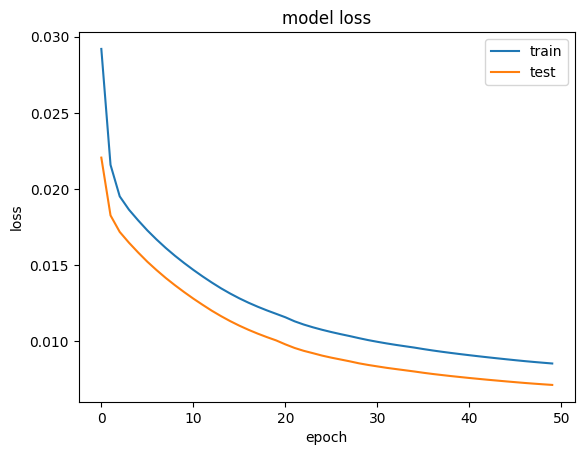

In [135]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()